# Python Basecamp (Chennai)

### Karthikeyan Sankaran, 17th June, 2018

## Simple Linear Regression with sample data

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline **

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Create sample dataframe using the straight line equation, y = mx+c (Ex: y = 5x+8) **

In [5]:
def straight_line(x):
    return 5*x + 8

np.random.seed(5)
samples = 150
x_vals = pd.Series(np.random.rand(samples)*20)
y_vals = x_vals.map(straight_line)

In [6]:
# Add random noise and set it to dataframe
y_noisy_vals = y_vals + np.random.randn(samples) * 3

df = pd.DataFrame({'x':x_vals, 'y_noisy':y_noisy_vals})
df.head()

,x,y_noisy
0,4.439863,27.659911
1,17.414646,102.635654
2,4.134383,24.974757
3,18.372218,102.041951
4,9.768224,56.978985


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [7]:
y = df.y_noisy
X = df[['x']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [9]:
from sklearn.linear_model import LinearRegression

** Create an instance of a LinearRegression() model named lm and fit training data **

In [10]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [11]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [5.04380857]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [12]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

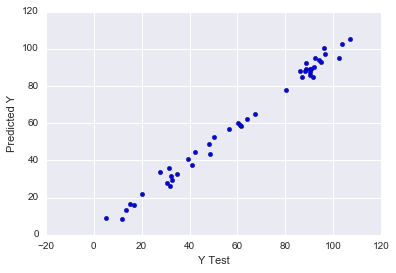

In [13]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [14]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.459969132408223
MSE: 9.299069422537187
RMSE: 3.0494375583928894
